In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib
import util_calculation
import util_diagnostic
import util_modelling
import util_preprocessing
import util_visualization

def reload():
  importlib.reload(util_calculation)
  importlib.reload(util_diagnostic)
  importlib.reload(util_preprocessing)
  importlib.reload(util_modelling)
  importlib.reload(util_visualization)

reload()
BASE_PATH = ""
COLUMN_EXISTS_TEST = []
colAdd = ["Lama_Kuliah", "Fakultas"]

In [117]:
NAN_VALUE = np.nan

In [118]:
df_test = pd.read_csv("Data - Test.csv", delimiter=";")
COLUMN_EXISTS_TEST = df_test.columns
COLUMN_EXISTS_TRAINING = df_test.columns.tolist()+ colAdd
print(COLUMN_EXISTS_TRAINING)
df_train = pd.read_csv("Data - Final.csv", delimiter=";")
df_train.shape

['Gender', 'Bahasa', 'Inggris', 'TIK', 'Matematika', 'Fisika', 'Kimia', 'Biologi', 'Geografi', 'Sosiologi', 'Antropologi', 'Extra_Kurikuler', 'Tinggal_Dengan', 'Status_Kerja', 'Biaya', 'Lama_Kuliah', 'Fakultas']


(11499, 22)

In [119]:
df_test.columns

Index(['Gender', 'Bahasa', 'Inggris', 'TIK', 'Matematika', 'Fisika', 'Kimia',
       'Biologi', 'Geografi', 'Sosiologi', 'Antropologi', 'Extra_Kurikuler',
       'Tinggal_Dengan', 'Status_Kerja', 'Biaya'],
      dtype='object')

In [120]:
df_train.columns

Index(['Nama', 'Gender', 'Bahasa', 'Inggris', 'TIK', 'Matematika', 'Fisika',
       'Kimia', 'Biologi', 'Geografi', 'Sosiologi', 'Antropologi',
       'Extra_Kurikuler', 'Tinggal_Dengan', 'Status_Kerja', 'Biaya',
       'Tgl_Daftar_Kuliah', 'Alamat', 'UKM', 'Organisasi_Kampus',
       'Lama_Kuliah', 'Fakultas'],
      dtype='object')

In [121]:
df_train_copy = df_train.copy()
df_train_copy = df_train_copy[COLUMN_EXISTS_TRAINING]
df_train_copy

,Gender,Bahasa,Inggris,TIK,Matematika,Fisika,Kimia,Biologi,Geografi,Sosiologi,Antropologi,Extra_Kurikuler,Tinggal_Dengan,Status_Kerja,Biaya,Lama_Kuliah,Fakultas
0,Pria,"69,8","64,6",64,"81,5","88,2","86,7","68,3",74,"67,7","70,7",Ekskul_4,Kos,Belum,Beasiswa,"3,5",DKV
1,Wanita,"68,7","88,3","80,9","80,7","67,8","67,3","72,1","77,3","64,4","62,8",Ekskul_4,NaN,Belum,NaN,4,FIKOM
2,Wanita,"83,8","79,8","79,2","66,3","82,3","82,7","74,2",84,"75,4","65,9",Ekskul_1,NaN,Bekerja,Beasiswa,"4,5",FIKOM
3,Wanita,"66,7","63,7",64,"60,2","75,9","87,6","85,6","68,1","73,7","61,7",Ekskul_4,Orang Tua,Belum,Beasiswa,"5,5",DKV
4,Wanita,"62,3","76,8",77,"87,1","65,1","65,7","70,8",67,"77,3",79,Ekskul_2,Orang Tua,Bekerja,NaN,"6,5",DKV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11494,Pria,61,"66,1","79,1",71,"78,7","74,4","69,1","77,2","65,8","61,3",Ekskul_3,Orang Tua,Belum,Orang Tua,"4,5",FIKOM
11495,Wanita,"75,7","76,6","86,5","78,7","86,2","87,2","81,4","62,3","71,3","83,8",Ekskul_3,NaN,Bekerja,Beasiswa,"3,5",DKV
11496,Wanita,"85,7",61,"82,7","77,6","78,7","76,3","82,2","68,6","76,5","70,9",Ekskul_2,Kos,Bekerja,Beasiswa,5,FT
11497,Wanita,"84,8","67,5","84,6","73,6","74,6","61,6","80,3","83,4","76,4","76,6",Ekskul_2,Kos,Bekerja,NaN,"4,5",DKV


Cari reasoning dari kenapa df_test cuman ada beebrapa kelas diatas dan tidak ada kelas lainnya 

In [122]:
## Kolom harus ada yang dihilangkan, karena di data testnya tidak ada, But do analysis why It is removed
## 
## 
## 

In [123]:
df_train_copy.dtypes

Gender             object
Bahasa             object
Inggris            object
TIK                object
Matematika         object
Fisika             object
Kimia              object
Biologi            object
Geografi           object
Sosiologi          object
Antropologi        object
Extra_Kurikuler    object
Tinggal_Dengan     object
Status_Kerja       object
Biaya              object
Lama_Kuliah        object
Fakultas           object
dtype: object

In [124]:
print(df_train_copy.isna().sum())
numCols = [
    "Bahasa",
    "Inggris",
    "TIK",
    "Matematika",
    "Fisika",
    "Kimia",
    "Biologi",
    "Geografi",
    "Sosiologi",
    "Antropologi"]

categoricalCols = [
    "Gender",
    "Extra_Kurikuler",
    "Status_Kerja",
    "Biaya",
    "Lama_Kuliah",
    "Fakultas",
    "Tinggal_Dengan"
]

Gender                0
Bahasa                0
Inggris               0
TIK                 526
Matematika            0
Fisika                0
Kimia                 0
Biologi               0
Geografi              0
Sosiologi           571
Antropologi         676
Extra_Kurikuler       0
Tinggal_Dengan     3982
Status_Kerja          0
Biaya              3779
Lama_Kuliah           0
Fakultas              0
dtype: int64


In [125]:
for i in df_train_copy.columns:
  
  print(df_train_copy[i].unique())

['Pria' 'Wanita']
['69,8' '68,7' '83,8' '66,7' '62,3' '66' '76,9' '61,6' '77' '73,2' '82,5'
 '70,7' '65,5' '63,9' '65,9' '72,1' '65,3' '73' '73,8' '88,6' '65,8'
 '70,2' '70,3' '64,8' '76,7' '73,3' '72,2' '72,7' '63,5' '85,8' '68,5'
 '84,7' '66,3' '80,7' '80' '68,3' '61,7' '71,6' '64,9' '80,5' '61,1'
 '88,5' '67,3' '62,8' '73,4' '75' '79,9' '81,6' '82,1' '64' '80,4' '66,8'
 '83' '62,6' '64,3' '65,2' '83,4' '81,7' '70,4' '66,1' '84,2' '78,5'
 '75,7' '69,9' '83,7' '84,5' '71,2' '73,1' '86' '80,9' '82,4' '75,6'
 '69,6' '70,9' '77,9' '79,7' '76' '64,7' '78,9' '75,9' '79,2' '80,6'
 '70,1' '65,4' '81,4' '66,2' '60,3' '70,5' '68,6' '78,6' '81,9' '64,1'
 '69,1' '85,1' '60,8' '87,7' '78,4' '72' '61,8' '74' '73,5' '87' '65' '88'
 '78' '84,8' '87,2' '71,4' '63,3' '87,4' '86,3' '62,1' '60,2' '76,5'
 '68,2' '76,1' '62,4' '63' '79,4' '85,7' '78,3' '74,2' '76,6' '83,6'
 '71,1' '66,6' '79,6' '88,2' '85,6' '86,4' '73,7' '73,6' '77,8' '64,5'
 '60,7' '75,1' '69,4' '83,9' '74,9' '69,7' '78,8' '68' '65,6' '

In [126]:
df_train_copy["Fakultas"].value_counts()

FT       2322
FTI      2316
FISIP    2299
DKV      2287
FIKOM    2275
Name: Fakultas, dtype: int64

In [127]:
util_visualization.drawCountPlot(df_train_copy, "Fakultas", "Fakultas", percentage=False)

In [128]:
numCols

['Bahasa',
 'Inggris',
 'TIK',
 'Matematika',
 'Fisika',
 'Kimia',
 'Biologi',
 'Geografi',
 'Sosiologi',
 'Antropologi']

In [129]:
df_train_copy.isna().sum()

Gender                0
Bahasa                0
Inggris               0
TIK                 526
Matematika            0
Fisika                0
Kimia                 0
Biologi               0
Geografi              0
Sosiologi           571
Antropologi         676
Extra_Kurikuler       0
Tinggal_Dengan     3982
Status_Kerja          0
Biaya              3779
Lama_Kuliah           0
Fakultas              0
dtype: int64

In [130]:
reload()
df_train_copy[numCols].fillna(np.nan,inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_17772\1651116896.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [131]:
util_diagnostic.getTotalUniqueColumns(df_train_copy,numCols)

Column : Bahasa, unique: 286, dtype: object
Column : Inggris, unique: 286, dtype: object
Column : TIK, unique: 275, dtype: object
Column : Matematika, unique: 286, dtype: object
Column : Fisika, unique: 286, dtype: object
Column : Kimia, unique: 286, dtype: object
Column : Biologi, unique: 286, dtype: object
Column : Geografi, unique: 286, dtype: object
Column : Sosiologi, unique: 274, dtype: object
Column : Antropologi, unique: 272, dtype: object


In [132]:
for i in df_train_copy.columns:
    print(df_train_copy[i].unique())

['Pria' 'Wanita']
['69,8' '68,7' '83,8' '66,7' '62,3' '66' '76,9' '61,6' '77' '73,2' '82,5'
 '70,7' '65,5' '63,9' '65,9' '72,1' '65,3' '73' '73,8' '88,6' '65,8'
 '70,2' '70,3' '64,8' '76,7' '73,3' '72,2' '72,7' '63,5' '85,8' '68,5'
 '84,7' '66,3' '80,7' '80' '68,3' '61,7' '71,6' '64,9' '80,5' '61,1'
 '88,5' '67,3' '62,8' '73,4' '75' '79,9' '81,6' '82,1' '64' '80,4' '66,8'
 '83' '62,6' '64,3' '65,2' '83,4' '81,7' '70,4' '66,1' '84,2' '78,5'
 '75,7' '69,9' '83,7' '84,5' '71,2' '73,1' '86' '80,9' '82,4' '75,6'
 '69,6' '70,9' '77,9' '79,7' '76' '64,7' '78,9' '75,9' '79,2' '80,6'
 '70,1' '65,4' '81,4' '66,2' '60,3' '70,5' '68,6' '78,6' '81,9' '64,1'
 '69,1' '85,1' '60,8' '87,7' '78,4' '72' '61,8' '74' '73,5' '87' '65' '88'
 '78' '84,8' '87,2' '71,4' '63,3' '87,4' '86,3' '62,1' '60,2' '76,5'
 '68,2' '76,1' '62,4' '63' '79,4' '85,7' '78,3' '74,2' '76,6' '83,6'
 '71,1' '66,6' '79,6' '88,2' '85,6' '86,4' '73,7' '73,6' '77,8' '64,5'
 '60,7' '75,1' '69,4' '83,9' '74,9' '69,7' '78,8' '68' '65,6' '

In [133]:
df_train_copy

,Gender,Bahasa,Inggris,TIK,Matematika,Fisika,Kimia,Biologi,Geografi,Sosiologi,Antropologi,Extra_Kurikuler,Tinggal_Dengan,Status_Kerja,Biaya,Lama_Kuliah,Fakultas
0,Pria,"69,8","64,6",64,"81,5","88,2","86,7","68,3",74,"67,7","70,7",Ekskul_4,Kos,Belum,Beasiswa,"3,5",DKV
1,Wanita,"68,7","88,3","80,9","80,7","67,8","67,3","72,1","77,3","64,4","62,8",Ekskul_4,NaN,Belum,NaN,4,FIKOM
2,Wanita,"83,8","79,8","79,2","66,3","82,3","82,7","74,2",84,"75,4","65,9",Ekskul_1,NaN,Bekerja,Beasiswa,"4,5",FIKOM
3,Wanita,"66,7","63,7",64,"60,2","75,9","87,6","85,6","68,1","73,7","61,7",Ekskul_4,Orang Tua,Belum,Beasiswa,"5,5",DKV
4,Wanita,"62,3","76,8",77,"87,1","65,1","65,7","70,8",67,"77,3",79,Ekskul_2,Orang Tua,Bekerja,NaN,"6,5",DKV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11494,Pria,61,"66,1","79,1",71,"78,7","74,4","69,1","77,2","65,8","61,3",Ekskul_3,Orang Tua,Belum,Orang Tua,"4,5",FIKOM
11495,Wanita,"75,7","76,6","86,5","78,7","86,2","87,2","81,4","62,3","71,3","83,8",Ekskul_3,NaN,Bekerja,Beasiswa,"3,5",DKV
11496,Wanita,"85,7",61,"82,7","77,6","78,7","76,3","82,2","68,6","76,5","70,9",Ekskul_2,Kos,Bekerja,Beasiswa,5,FT
11497,Wanita,"84,8","67,5","84,6","73,6","74,6","61,6","80,3","83,4","76,4","76,6",Ekskul_2,Kos,Bekerja,NaN,"4,5",DKV


In [134]:
reload()
df_train_copy= util_preprocessing.changeToFloatNums(df_train_copy, numCols, np.nan )

In [135]:
df_train_copy["Bahasa"].values

array([69.8, 68.7, 83.8, ..., 85.7, 84.8, 85.2])

In [136]:
df_train_copy[numCols].pcorr()

,Bahasa,Inggris,TIK,Matematika,Fisika,Kimia,Biologi,Geografi,Sosiologi,Antropologi
Bahasa,1.000000,0.017399,-0.000258,-0.004301,0.014761,-0.013554,-0.006765,-0.005630,-0.009412,-0.002460
Inggris,0.017399,1.000000,-0.019256,0.002696,-0.005734,0.000015,0.005020,-0.001052,0.008981,0.001876
TIK,-0.000258,-0.019256,1.000000,0.004838,-0.014909,-0.003275,0.014398,-0.017940,0.004725,0.024234
Matematika,-0.004301,0.002696,0.004838,1.000000,0.001629,0.018624,0.005912,-0.007636,0.002802,0.001700
Fisika,0.014761,-0.005734,-0.014909,0.001629,1.000000,0.011740,0.005316,-0.009143,0.003485,-0.008889
Kimia,-0.013554,0.000015,-0.003275,0.018624,0.011740,1.000000,-0.008988,-0.008256,-0.010754,0.012029
Biologi,-0.006765,0.005020,0.014398,0.005912,0.005316,-0.008988,1.000000,-0.005909,-0.012042,-0.011141
Geografi,-0.005630,-0.001052,-0.017940,-0.007636,-0.009143,-0.008256,-0.005909,1.000000,0.016137,-0.001718
Sosiologi,-0.009412,0.008981,0.004725,0.002802,0.003485,-0.010754,-0.012042,0.016137,1.000000,0.008228
Antropologi,-0.002460,0.001876,0.024234,0.001700,-0.008889,0.012029,-0.011141,-0.001718,0.008228,1.000000


In [137]:
reload()
util_visualization.drawHeatmap(np.round(df_train_copy[numCols].corr(),2),numCols, numCols, "Korelasi Linear Antara Nilai Numerik" )

## Analyze The Sosiology
df_train_copy

In [138]:
df_train_copy[numCols].describe()

,Bahasa,Inggris,TIK,Matematika,Fisika,Kimia,Biologi,Geografi,Sosiologi,Antropologi
count,11499.000000,11499.000000,10932.00000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,10928.000000,10823.000000
mean,74.350570,74.387599,74.23981,74.443534,74.352692,74.334820,74.349691,74.283755,74.217258,74.166682
std,8.229366,8.302509,8.20048,8.240524,8.264629,8.279217,8.259486,8.245244,8.225752,8.289890
min,60.100000,60.100000,60.10000,60.100000,60.100000,60.100000,60.100000,60.100000,60.100000,60.100000
25%,67.300000,67.200000,67.10000,67.400000,67.300000,67.200000,67.300000,67.100000,67.100000,66.900000
50%,74.200000,74.500000,74.20000,74.500000,74.400000,74.200000,74.300000,74.400000,74.200000,74.000000
75%,81.400000,81.600000,81.30000,81.600000,81.400000,81.500000,81.600000,81.350000,81.400000,81.400000
max,88.600000,88.600000,88.60000,88.600000,88.600000,88.600000,88.600000,88.600000,88.600000,88.600000


df

In [139]:
reload()
for i in numCols:
    if(i == "Inggris" or i == "Bahasa"):
        util_visualization.drawHistogram(df_train_copy, i, 10).show()

In [140]:
df_train_copy.head()
#df_train_copy.to_csv("Data-final_converted.csv",index=False)

,Gender,Bahasa,Inggris,TIK,Matematika,Fisika,Kimia,Biologi,Geografi,Sosiologi,Antropologi,Extra_Kurikuler,Tinggal_Dengan,Status_Kerja,Biaya,Lama_Kuliah,Fakultas
0,Pria,69.8,64.6,64.0,81.5,88.2,86.7,68.3,74.0,67.7,70.7,Ekskul_4,Kos,Belum,Beasiswa,"3,5",DKV
1,Wanita,68.7,88.3,80.9,80.7,67.8,67.3,72.1,77.3,64.4,62.8,Ekskul_4,NaN,Belum,NaN,4,FIKOM
2,Wanita,83.8,79.8,79.2,66.3,82.3,82.7,74.2,84.0,75.4,65.9,Ekskul_1,NaN,Bekerja,Beasiswa,"4,5",FIKOM
3,Wanita,66.7,63.7,64.0,60.2,75.9,87.6,85.6,68.1,73.7,61.7,Ekskul_4,Orang Tua,Belum,Beasiswa,"5,5",DKV
4,Wanita,62.3,76.8,77.0,87.1,65.1,65.7,70.8,67.0,77.3,79.0,Ekskul_2,Orang Tua,Bekerja,NaN,"6,5",DKV


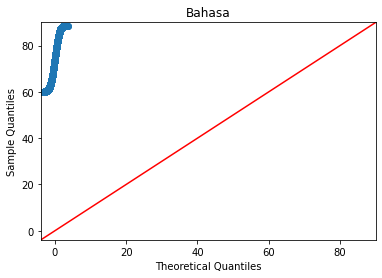

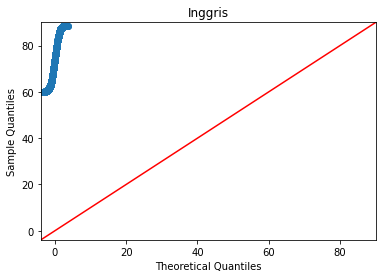

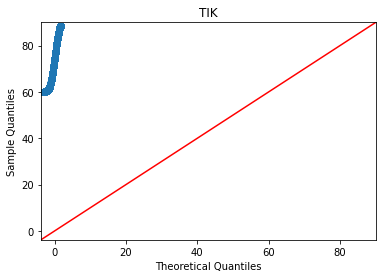

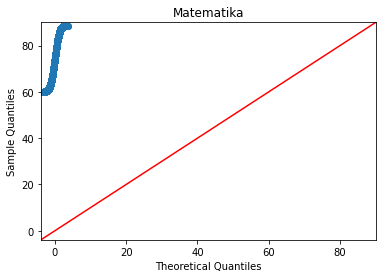

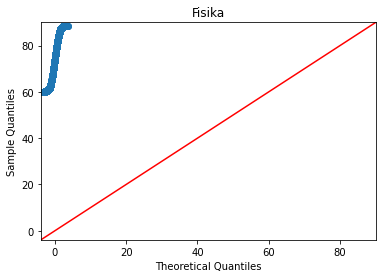

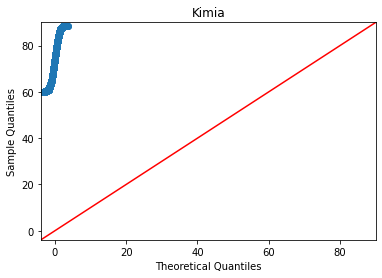

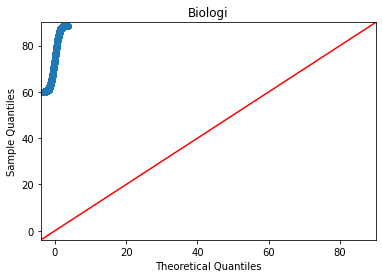

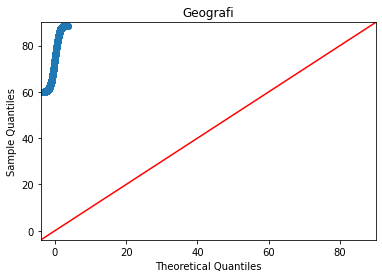

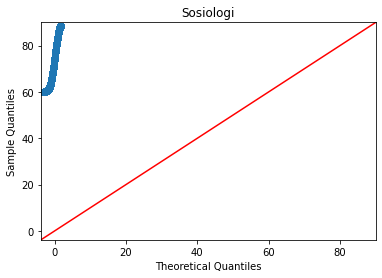

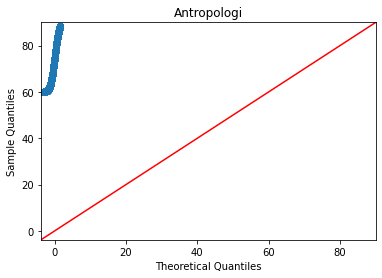

In [141]:
reload()
for i in numCols:
    util_visualization.drawQQPlot(df_train_copy[i].values,i)

In [142]:
df_train_normalize, scaler = util_preprocessing.normalizeNumericColumn(df_train_copy, numCols)

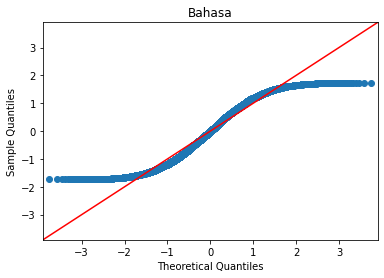

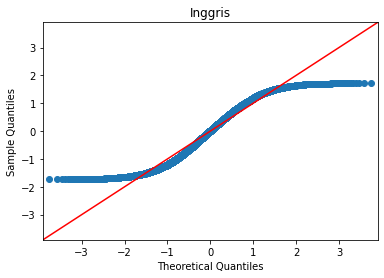

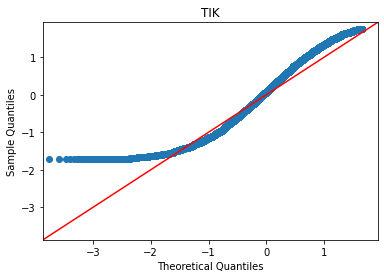

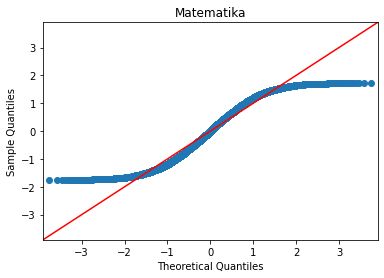

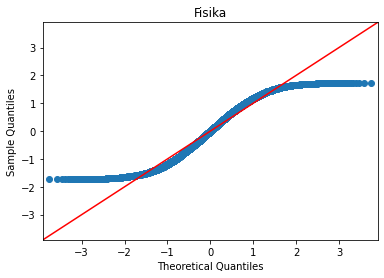

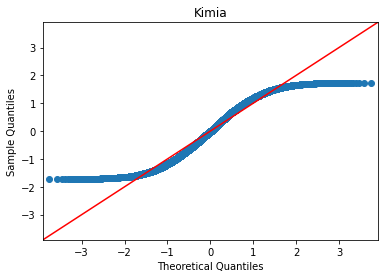

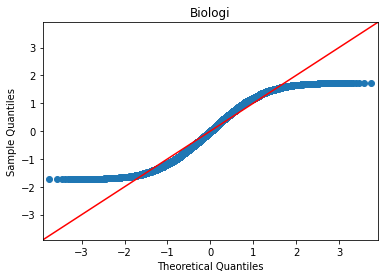

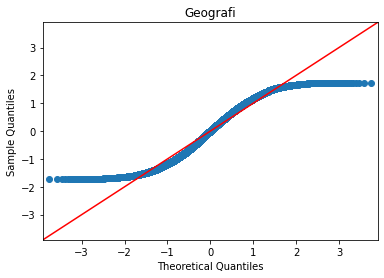

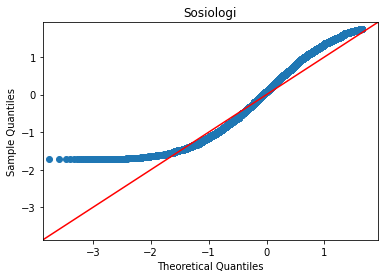

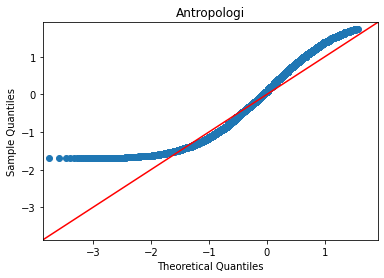

In [143]:
reload()
for i in numCols:
    util_visualization.drawQQPlot(df_train_copy[i].values,i)

In [144]:
np.round(df_train_normalize.describe())

,Bahasa,Inggris,TIK,Matematika,Fisika,Kimia,Biologi,Geografi,Sosiologi,Antropologi
count,11499.0,11499.0,10932.0,11499.0,11499.0,11499.0,11499.0,11499.0,10928.0,10823.0
mean,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
25%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
50%,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [145]:
df_train_normalize

,Bahasa,Inggris,TIK,Matematika,Fisika,Kimia,Biologi,Geografi,Sosiologi,Antropologi
0,-0.552991,-1.178924,-1.248741,0.856350,1.675564,1.493585,-0.732486,-0.034416,-0.792336,-0.418201
1,-0.686665,1.675759,0.812208,0.759265,-0.792894,-0.849733,-0.272389,0.365832,-1.193533,-1.371213
2,1.148307,0.651928,0.604894,-0.988273,0.961647,1.010427,-0.018124,1.178457,0.143792,-0.997247
3,-0.929707,-1.287329,-1.248741,-1.728549,0.187229,1.602296,1.362167,-0.750011,-0.062886,-1.503911
4,-1.464401,0.290576,0.336604,1.535948,-1.119602,-1.042997,-0.429790,-0.883427,0.374784,0.583065
...,...,...,...,...,...,...,...,...,...,...
11494,-1.622379,-0.998248,0.592699,-0.417896,0.526037,0.007873,-0.635623,0.353703,-1.023328,-1.552165
11495,0.163985,0.266485,1.495126,0.516551,1.433558,1.553980,0.853639,-1.453477,-0.354666,1.162110
11496,1.379198,-1.612546,1.031717,0.383059,0.526037,0.237373,0.950501,-0.689367,0.277524,-0.394074
11497,1.269829,-0.829617,1.263422,-0.102369,0.029925,-1.538234,0.720453,1.105685,0.265367,0.293542


In [146]:
numCols

['Bahasa',
 'Inggris',
 'TIK',
 'Matematika',
 'Fisika',
 'Kimia',
 'Biologi',
 'Geografi',
 'Sosiologi',
 'Antropologi']

In [147]:
util_visualization.drawHeatmap(np.round(df_train_normalize.corr(),2), numCols, numCols, "title")

In [148]:
categoricalCols

['Gender',
 'Extra_Kurikuler',
 'Status_Kerja',
 'Biaya',
 'Lama_Kuliah',
 'Fakultas',
 'Tinggal_Dengan']

In [149]:
df_train_copy_cleaned, catEncoder = util_preprocessing.encodeCategoricalColumn(df_train_copy, categoricalCols)
df_train_copy_cleaned

,Gender,Bahasa,Inggris,TIK,Matematika,Fisika,Kimia,Biologi,Geografi,Sosiologi,Antropologi,Extra_Kurikuler,Tinggal_Dengan,Status_Kerja,Biaya,Lama_Kuliah,Fakultas
0,0,-0.552991,-1.178924,-1.248741,0.856350,1.675564,1.493585,-0.732486,-0.034416,-0.792336,-0.418201,3,0,1,0,0,0
1,1,-0.686665,1.675759,0.812208,0.759265,-0.792894,-0.849733,-0.272389,0.365832,-1.193533,-1.371213,3,2,1,2,1,1
2,1,1.148307,0.651928,0.604894,-0.988273,0.961647,1.010427,-0.018124,1.178457,0.143792,-0.997247,0,2,0,0,2,1
3,1,-0.929707,-1.287329,-1.248741,-1.728549,0.187229,1.602296,1.362167,-0.750011,-0.062886,-1.503911,3,1,1,0,4,0
4,1,-1.464401,0.290576,0.336604,1.535948,-1.119602,-1.042997,-0.429790,-0.883427,0.374784,0.583065,1,1,0,2,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11494,0,-1.622379,-0.998248,0.592699,-0.417896,0.526037,0.007873,-0.635623,0.353703,-1.023328,-1.552165,2,1,1,1,2,1
11495,1,0.163985,0.266485,1.495126,0.516551,1.433558,1.553980,0.853639,-1.453477,-0.354666,1.162110,2,2,0,0,0,0
11496,1,1.379198,-1.612546,1.031717,0.383059,0.526037,0.237373,0.950501,-0.689367,0.277524,-0.394074,1,0,0,0,3,3
11497,1,1.269829,-0.829617,1.263422,-0.102369,0.029925,-1.538234,0.720453,1.105685,0.265367,0.293542,1,0,0,2,2,0


In [150]:
df_train_copy_cleaned

,Gender,Bahasa,Inggris,TIK,Matematika,Fisika,Kimia,Biologi,Geografi,Sosiologi,Antropologi,Extra_Kurikuler,Tinggal_Dengan,Status_Kerja,Biaya,Lama_Kuliah,Fakultas
0,0,-0.552991,-1.178924,-1.248741,0.856350,1.675564,1.493585,-0.732486,-0.034416,-0.792336,-0.418201,3,0,1,0,0,0
1,1,-0.686665,1.675759,0.812208,0.759265,-0.792894,-0.849733,-0.272389,0.365832,-1.193533,-1.371213,3,2,1,2,1,1
2,1,1.148307,0.651928,0.604894,-0.988273,0.961647,1.010427,-0.018124,1.178457,0.143792,-0.997247,0,2,0,0,2,1
3,1,-0.929707,-1.287329,-1.248741,-1.728549,0.187229,1.602296,1.362167,-0.750011,-0.062886,-1.503911,3,1,1,0,4,0
4,1,-1.464401,0.290576,0.336604,1.535948,-1.119602,-1.042997,-0.429790,-0.883427,0.374784,0.583065,1,1,0,2,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11494,0,-1.622379,-0.998248,0.592699,-0.417896,0.526037,0.007873,-0.635623,0.353703,-1.023328,-1.552165,2,1,1,1,2,1
11495,1,0.163985,0.266485,1.495126,0.516551,1.433558,1.553980,0.853639,-1.453477,-0.354666,1.162110,2,2,0,0,0,0
11496,1,1.379198,-1.612546,1.031717,0.383059,0.526037,0.237373,0.950501,-0.689367,0.277524,-0.394074,1,0,0,0,3,3
11497,1,1.269829,-0.829617,1.263422,-0.102369,0.029925,-1.538234,0.720453,1.105685,0.265367,0.293542,1,0,0,2,2,0


Correlation Matrix for cramers


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

,Biaya,Gender,Status_Kerja,Tinggal_Dengan,Fakultas
Biaya,1.000000,0.000000,0.000000,0.007098,0.008464
Gender,0.000000,1.000000,0.014164,0.000000,0.014138
Status_Kerja,0.000000,0.014164,1.000000,0.000000,0.013693
Tinggal_Dengan,0.007098,0.000000,0.000000,1.000000,0.000000
Fakultas,0.008464,0.014138,0.013693,0.000000,1.000000


<AxesSubplot:title={'center':'Correlation Heatmap for cramers'}>

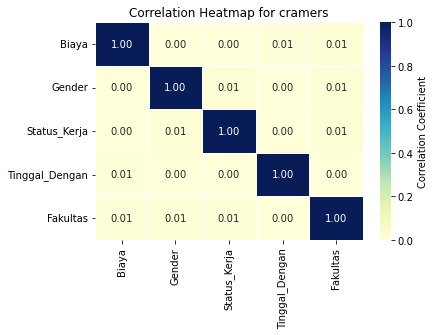

In [161]:
util_calculation.calculateCorrelationCategorical(df_train_copy_cleaned)

In [166]:
reload()
df_cramer = util_diagnostic.getCramers_V(df_train_copy_cleaned,categoricalCols)
util_visualization.drawHeatmap(df_cramer,categoricalCols,categoricalCols, "Cramers Correlation")